#**TRANSFORMADA Z**


---


Elaborado por Javier Chaparro

A continuación se utilizan librerías de Python para :
1. Definir una función de transferencia, ocualquier otra función en el dominio de z.
2. Calcular los polos y ceros de la función.
3. Obtener la respuesta al impulso, es decir, la transformada inversa de H(z)
4. Obtener la respuesta a la señal escalón.
5. Obtener la salida ante una entrada arbitraria.

Para explicar los puntos anteriores se utilizará una función de ejemplo. Es este caso sera:
$$
H_1(z)=\frac{1}{z{^2}-\sqrt(2)z+1}
$$
Esta función de transferencia se utilizó en clase. Esta conformada por dos polos complejos conjuados ubicados sobre el círculo de radio unitario y ángulo de π/4 y -π/4. Es decir:

$$
p_1=0.707 + 0.707i
$$
$$
p_2=0.707 - 0.707i
$$

Se importan las librerias necesarias

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#**Primer ejemplo**

## Función de transferencia

Se declara la función de transferencia

In [3]:
# Los polinomios del numerador y denominador son:
num=[1]
dem=[1,-1.4142,1]
# Se declara la función de transferencia con la función dlti
Hz=signal.dlti(num, dem, dt=1)

Se verifican los polos y ceros de H(z)

In [4]:
# Polos de H(z)
Hz.poles

array([0.7071+0.70711356j, 0.7071-0.70711356j])

In [5]:
# Zeros de H(z)
Hz.zeros

array([], dtype=float64)

Se puede evidenciar que los polos estan ubicados sobre el circulo unitario y son complejos conjugados. No tiene ceros.

In [9]:
print('Magnitud de los polos : ',np.abs(Hz.poles))
print('Ángulo de los polos : ',(180/np.pi)*np.angle(Hz.poles))

Magnitud de los polos :  [1. 1.]
Ángulo de los polos :  [ 45.00054947 -45.00054947]


## Respuesta al Impulso

Utilizando la función de transferencia anterior se calculará la respuesta al impulso:

<StemContainer object of 3 artists>

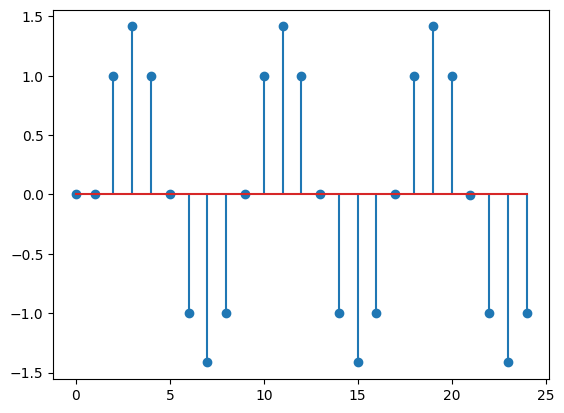

In [ ]:
t, y = signal.dimpulse(Hz, n=25)
h=y[0][:]
plt.stem(h)

La gráfica demuestra que la respuesta impulsiva de la función de transferencia corresponde a un sistema oscilatorio.

Para verificar la respuesta anterior se puede calcular la transformada inversa de H(z), recuerde que si la entrada es un impulso unitario, $x(n)$=$δ(n)$ su transformada Z será $X(Z)=1$, por lo tanto la salida se calcula como:

$$
Y(z)=X(Z)H(Z)=H(z)
$$

Y de esta forma la respuesta al impulso $h(n)$ será la transformada inversa de $H(z)$. En un ejercicio en clase se obtuve mediante la división de los polinomios que la conforman.


## Respuesta al Escalón

<StemContainer object of 3 artists>

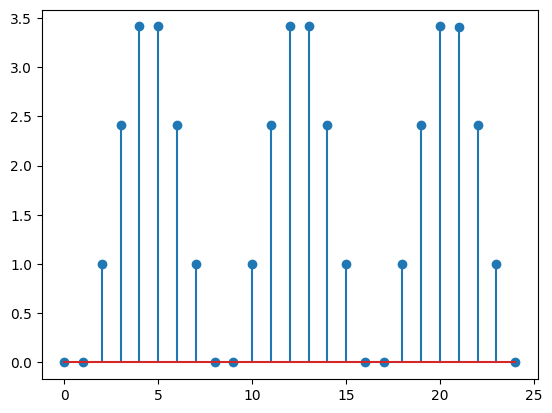

In [ ]:
t, y = signal.dstep(Hz, n=25)
s=y[0][:]
plt.stem(t,s)

Esta respuesta tambien es oscilatoria como era de esperarse en este tipo de sistema.



---



#**Segundo ejemplo**

El siguiente ejemplo se utiliza la función de transferencia:

$$
H_2(z)=\frac{1}{1-0.5z^{-1}}
$$

In [ ]:
# Declaración de la función
num=[1]
dem=[1,-0.5]
Hz=signal.dlti(num, dem, dt=1)

Text(0.5, 1.0, 'Respuesta al impulso')

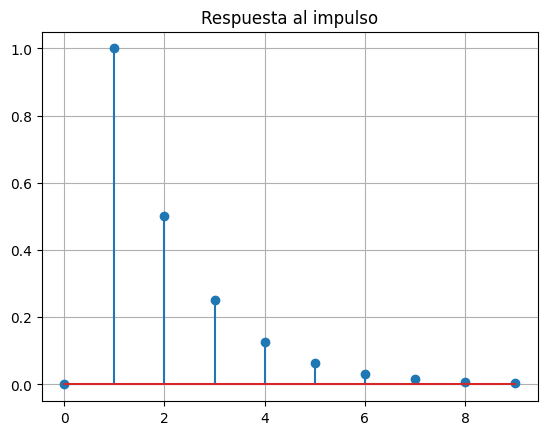

In [ ]:
# Respuesta al  impulso unitario
t,y=signal.dimpulse(Hz,n=10)
h=y[0][:]
plt.stem(t,h)
plt.grid()
plt.title('Respuesta al impulso')

En clase esta salida se obtuvo empleando la ecuación en diferencias que corresponde a esa función de transferencia. Su ecuación se obtiene de la forma:

$$
Y(Z)=X(Z)H(Z)=X(Z)\frac{1}{1-0.5z^{-1}}
$$

$$
Y(Z)[1-0.5z^{-1}]=X(Z)
$$

$$
Y(Z)=X(Z)+0.5Y(Z)z^{-1}
$$

La transformada Z inversa de esta expresión es:
$$
y(n)=x(n) + 0.5y(n-1)
$$

El cálculo de la respuesta al impulso empleando esta ecuación en diferencias y lenguaje Python, ó lenguaje C, se puede hacer de la siguiente forma:

Text(0.5, 1.0, 'Respuesta al impulso')

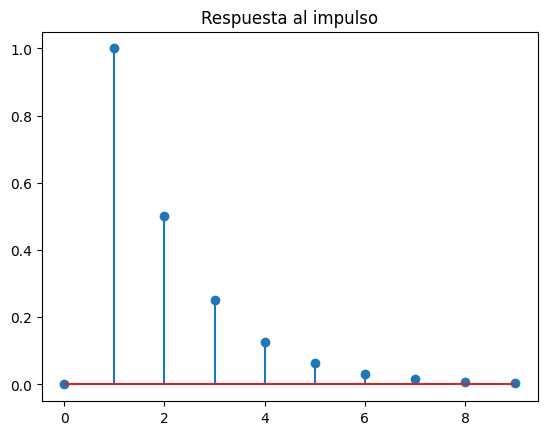

In [18]:
# Se declara la entrada impulsiva
x=[0,1,0,0,0,0,0,0,0,0]
N=len(x)
# Se crea un vector vacio para la salida
y=np.zeros(N)
# Se calcula la salida
for n in range(1,N):
  y[n]=x[n]+0.5*y[n-1]
plt.stem(y)
plt.title('Respuesta al impulso')

Se puede observar que esta gráfica es similar a la anterior.

##Respuesta del sistema ante una entrada arbitraria

<StemContainer object of 3 artists>

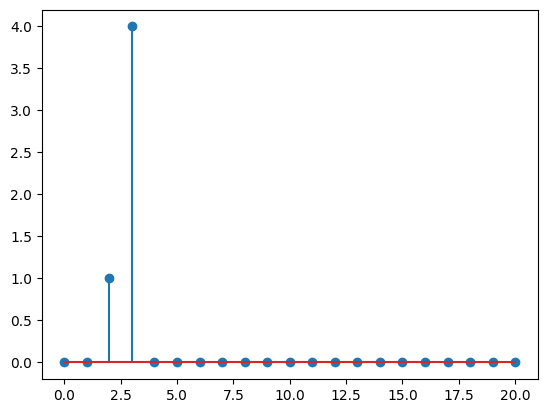

In [22]:
# Creación de la entrada arbitraria
N=21
n= np.arange(0,N,1)
u= np.zeros(N)
u[2]=1
u[3]=4
plt.stem(n,u)

In [20]:
# Se crea un objeto de función de transferencia
signal.tf=(num, dem, 1.0)

<StemContainer object of 3 artists>

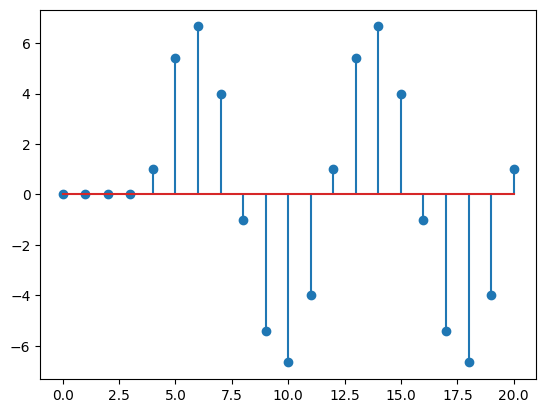

In [23]:
t_out, y = signal.dlsim(tf, u, t=n)
plt.stem(t_out,y)

#**Taller**
Este taller se debe hacer utilizando las librerias y funciones propuestas en este cuadernillo.

1. Aplicar al sistema descrito en $H_2(Z)$ un entrada de tipo senosoidal de amplitud 1 y frecuencia 0.1 rad/seg. Obtener la gráfica de la entrada y la salida.
2. Determine la función de transferencia, la respuesta del impulso y escalón unitario del sistema descrito por la ecuación en diferencia:
$$
y(n)=\frac{1}{2}y(n-1)+2x(n)
$$
3. Obtener la respuesta impulsiva del sistema caracterizado por la siguiente función de transferencia:
$$
H(z)=\frac{1}{1-1.5z^{-1}+0.5z^{-2}}
$$